# Введение в машинное обучение. Экзамен. Билет 3

### Выполнил: Сергиенко Александр Сергеевич
### Дата: 27.01.2026



## **1. Предварительный анализ данных (10 баллов)**


### 1.1. Изучение датасета

Загрузим данные и изучим структуру.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных с правильным разделителем
df = pd.read_csv("global_air_pollution_dataset.csv", sep=';')

# Выбор строк 7823-11733
df = df.iloc[7822:11734].reset_index(drop=True)

# Вывод первых строк
print("Первые 5 строк датасета:")
display(df.head())
print(f"\nРазмер датасета: {df.shape}")
print("\nИнформация о столбцах и типах данных:")
df.info()

Первые 5 строк датасета:


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,Y1,Y2
0,Viet Nam,Vinh Yen,82,Moderate,2,Good,56,Moderate,2,Good,82,Moderate
1,India,Visakhapatnam,155,Unhealthy,2,Good,78,Moderate,2,Good,155,Unhealthy
2,Serbia,Vrsac,38,Good,1,Good,37,Good,1,Good,38,Good
3,India,Wadhwan,158,Unhealthy,1,Good,38,Good,0,Good,158,Unhealthy
4,India,Washim,150,Unhealthy,1,Good,40,Good,0,Good,150,Unhealthy



Размер датасета: (3912, 12)

Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             3840 non-null   object
 1   City                3912 non-null   object
 2   AQI Value           3912 non-null   int64 
 3   AQI Category        3912 non-null   object
 4   CO AQI Value        3912 non-null   int64 
 5   CO AQI Category     3912 non-null   object
 6   Ozone AQI Value     3912 non-null   int64 
 7   Ozone AQI Category  3912 non-null   object
 8   NO2 AQI Value       3912 non-null   int64 
 9   NO2 AQI Category    3912 non-null   object
 10  Y1                  3912 non-null   int64 
 11  Y2                  3912 non-null   object
dtypes: int64(5), object(7)
memory usage: 366.9+ KB


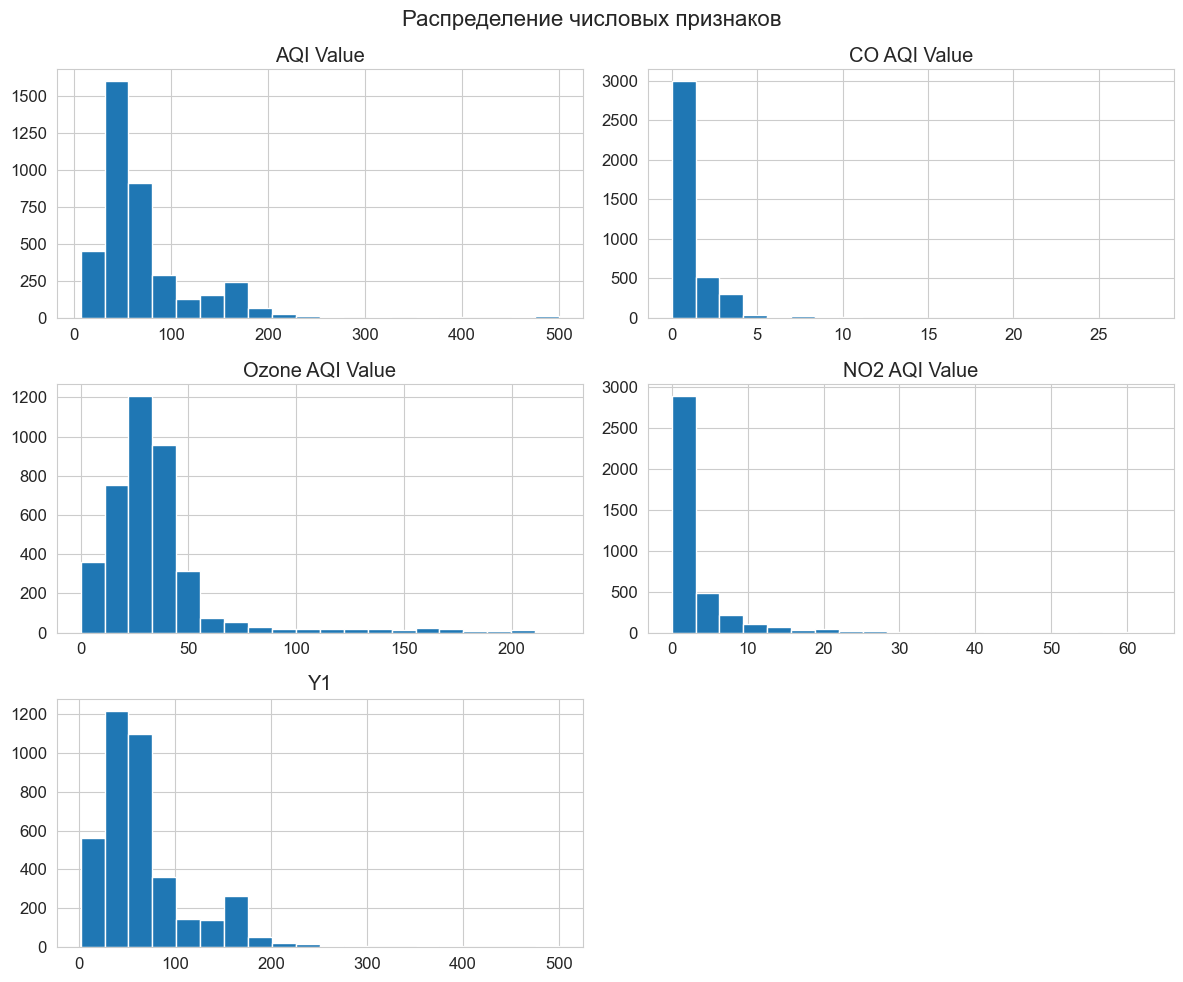

In [18]:
# Визуализация распределения числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Распределение числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

### 1.2. Обработка пропущенных значений

In [19]:
# Проверка пропусков
print("\nПропущенные значения по столбцам:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Для числовых столбцов заполним медианой, для категориальных - модой
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

print(f"Размер после обработки пропусков: {df.shape}")


Пропущенные значения по столбцам:
Country    72
dtype: int64
Размер после обработки пропусков: (3912, 12)


### 1.3. Описательная статистика



Описательная статистика числовых признаков:


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,Y1
count,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000
mean,72.044479,1.359663,34.799080,3.105573,68.508947
std,55.477809,1.542458,27.809972,5.407775,53.994672
min,7.000000,0.000000,0.000000,0.000000,2.000000
25%,39.750000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,30.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,28.000000,222.000000,63.000000,500.000000


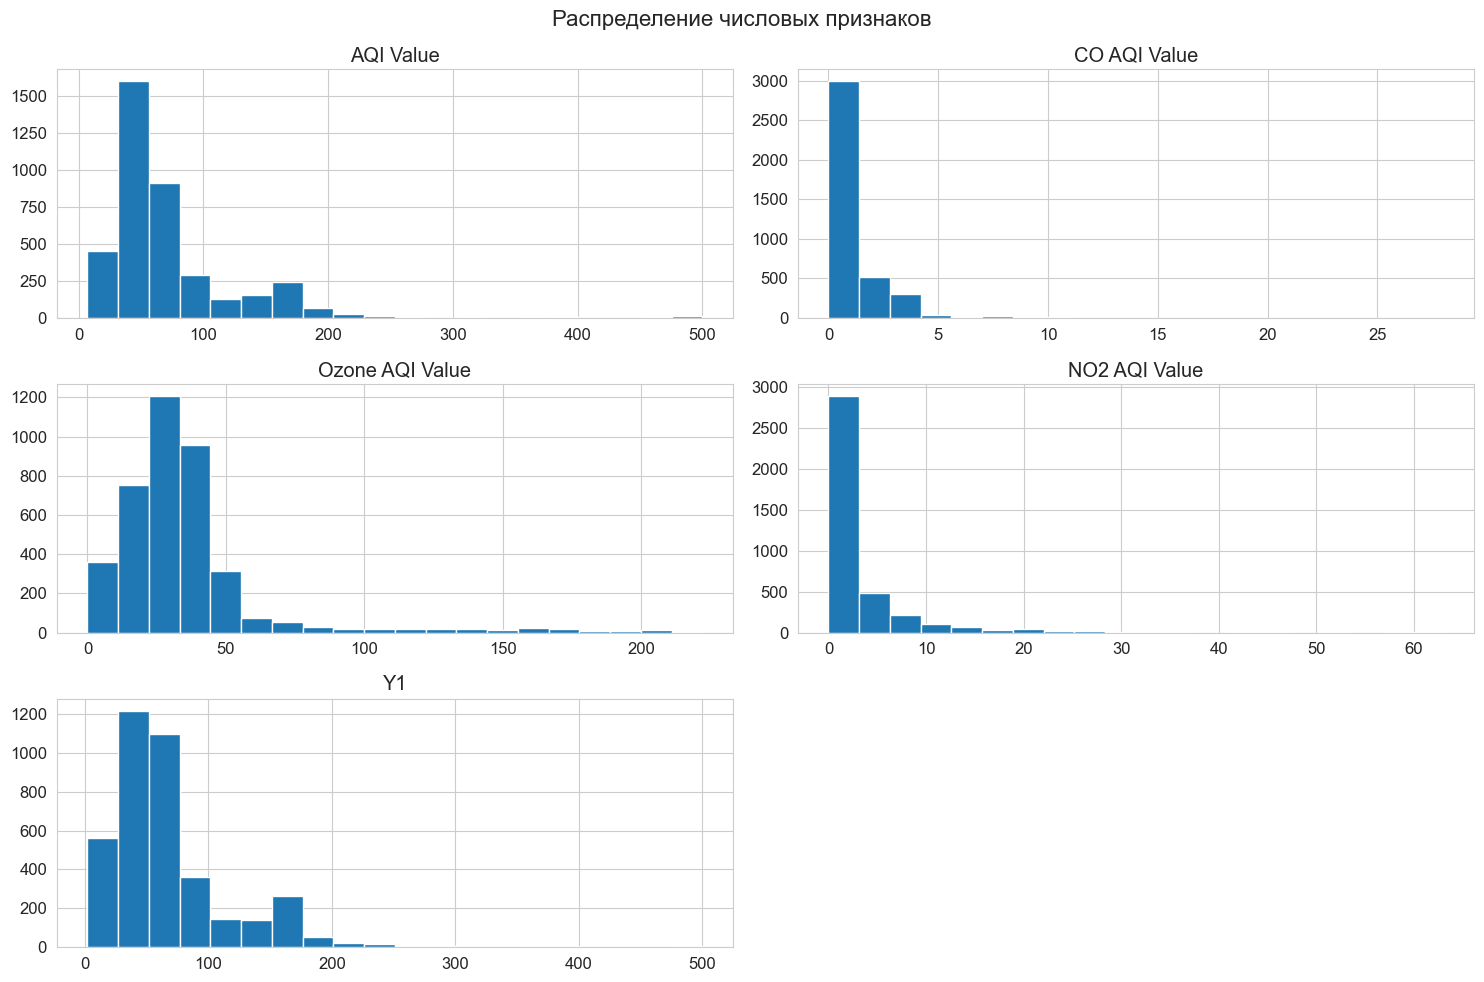

In [20]:
# Выделим числовые столбцы
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    print("\nОписательная статистика числовых признаков:")
    display(df[numeric_cols].describe())
    
    # Визуализация распределения числовых признаков
    df[numeric_cols].hist(figsize=(15, 10), bins=20)
    plt.suptitle('Распределение числовых признаков', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("\nНет числовых столбцов. Пробуем преобразовать...")
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            continue
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    
    if len(numeric_cols) > 0:
        print("\nОписательная статистика после преобразования:")
        display(df[numeric_cols].describe())
        
        df[numeric_cols].hist(figsize=(15, 10), bins=20)
        plt.suptitle('Распределение числовых признаков', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("Не удалось преобразовать столбцы в числовые.")

### 1.4. Выбросы



Поиск выбросов:
Столбец AQI Value: 504 выбросов
Столбец CO AQI Value: 1461 выбросов
Столбец Ozone AQI Value: 237 выбросов
Столбец NO2 AQI Value: 270 выбросов
Столбец Y1: 459 выбросов

Обработка выбросов...
Обработано выбросов в 5 столбцах


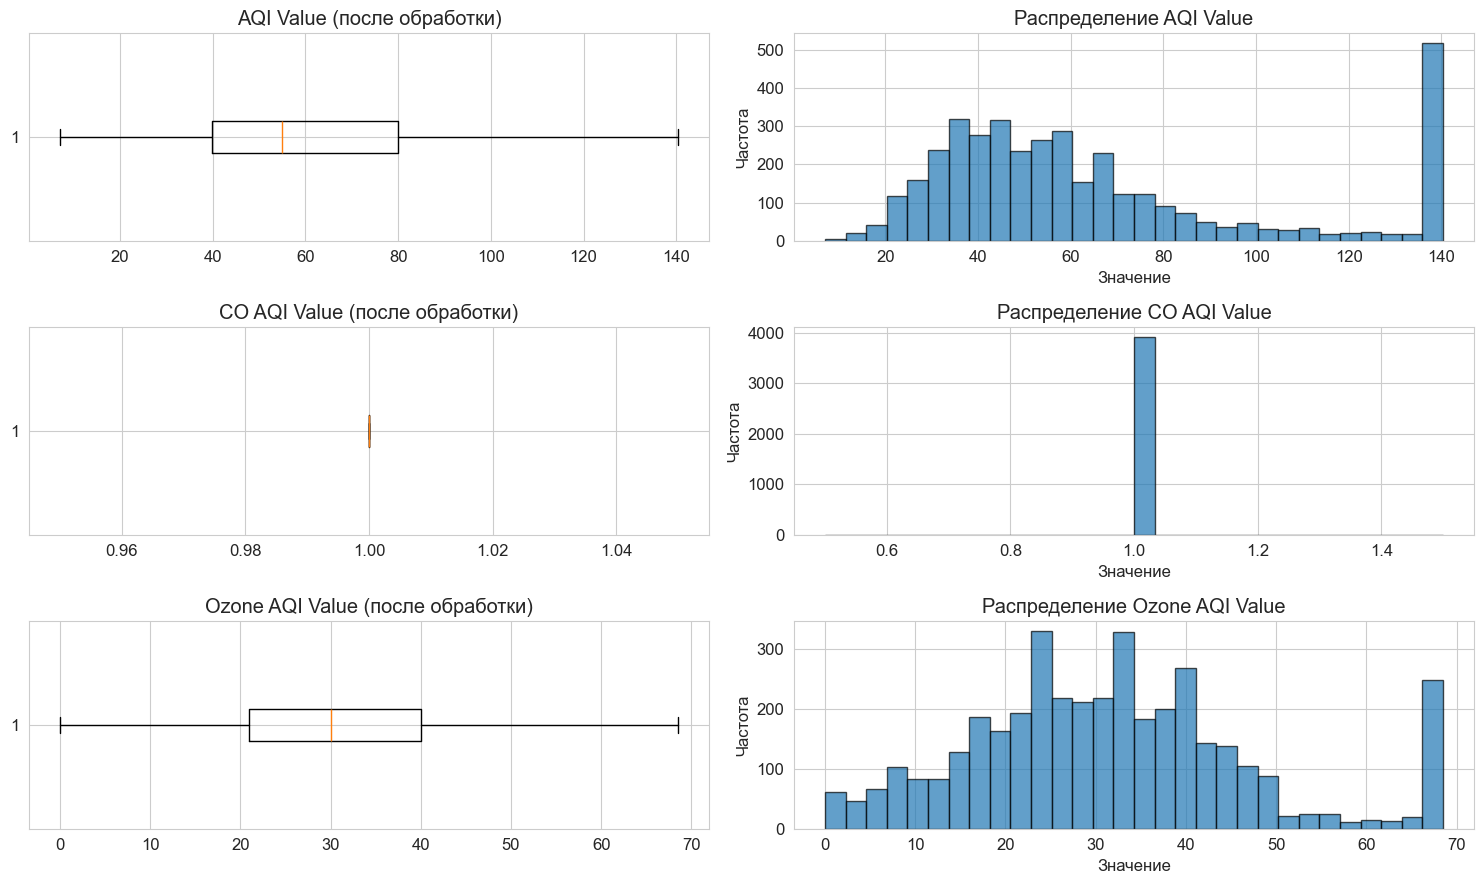

In [21]:
# Функция для обнаружения выбросов
def detect_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series([])

# Поиск выбросов в числовых столбцах
print("\nПоиск выбросов:")
outliers_info = {}
for col in numeric_cols:
    outliers = detect_outliers(df[col])
    if len(outliers) > 0:
        outliers_info[col] = len(outliers)
        print(f"Столбец {col}: {len(outliers)} выбросов")

# Обработка выбросов - замена на граничные значения
print("\nОбработка выбросов...")
for col in outliers_info:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Заменяем выбросы на граничные значения
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print(f"Обработано выбросов в {len(outliers_info)} столбцах")

# Визуализация выбросов (до и после)
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(min(3, len(numeric_cols)), 2, figsize=(15, min(9, len(numeric_cols)*3)))
    
    for i, col in enumerate(numeric_cols[:3]):  # Покажем только первые 3
        # До обработки (оригинальные данные в памяти уже изменены, поэтому используем копию)
        df_copy = df.copy()
        # Восстанавливаем оригинальные значения (это демонстрация)
        # На практике мы уже обработали выбросы, поэтому покажем только обработанные
        axes[i, 0].boxplot(df[col].dropna(), vert=False)
        axes[i, 0].set_title(f'{col} (после обработки)')
        
        # Гистограмма распределения
        axes[i, 1].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i, 1].set_title(f'Распределение {col}')
        axes[i, 1].set_xlabel('Значение')
        axes[i, 1].set_ylabel('Частота')
    
    plt.tight_layout()
    plt.show()

### 1.5. Корреляционный анализ и отбор признаков



=== Корреляционный анализ ===
Доступные столбцы: ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'Y1', 'Y2']
Найдены целевые столбцы: Y1='Y1', Y2='Y2'

Корреляционная матрица:


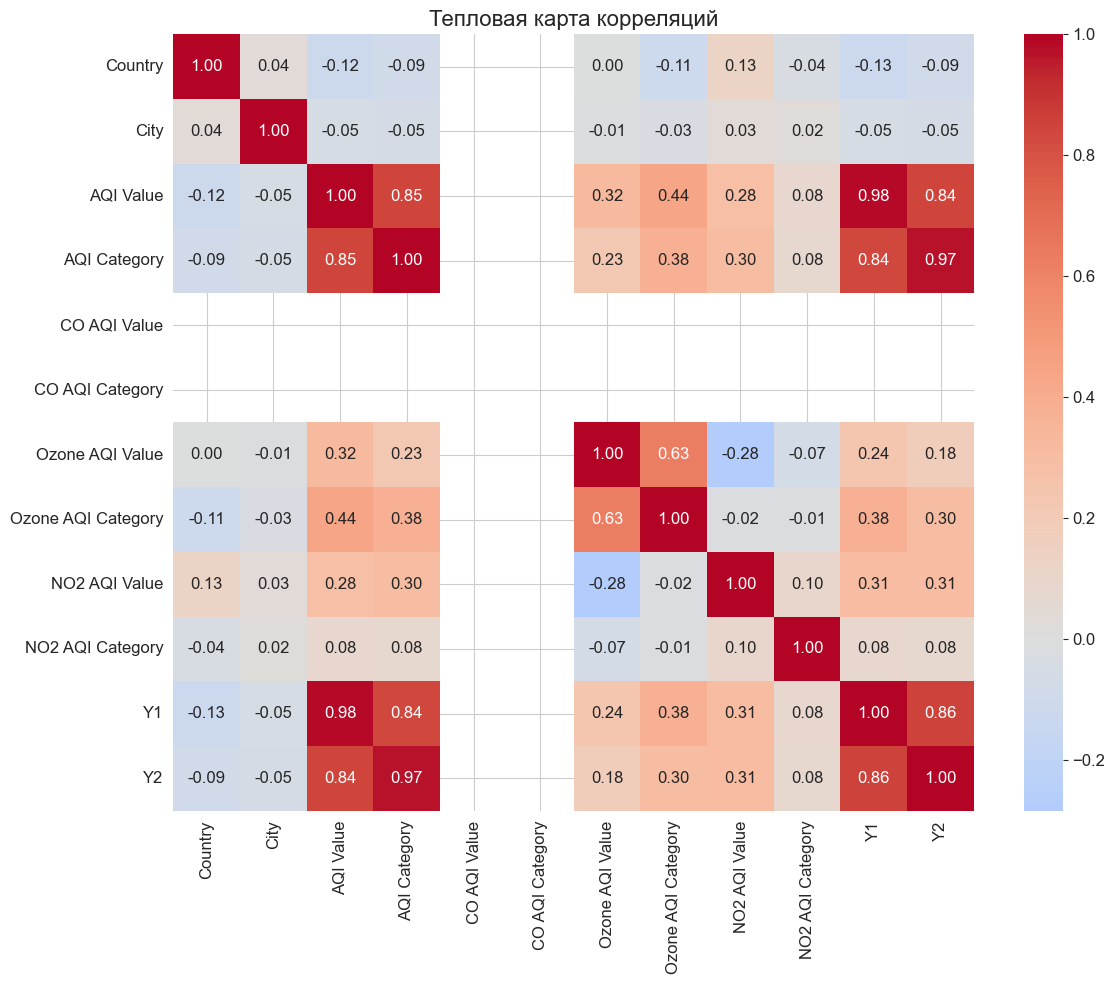


Анализ сильно коррелирующих признаков:
Корреляция признаков с Y1:
Y1                    1.000000
AQI Value             0.980451
Y2                    0.855797
AQI Category          0.838969
Ozone AQI Category    0.382892
NO2 AQI Value         0.309343
Ozone AQI Value       0.242009
Country               0.127698
NO2 AQI Category      0.081294
City                  0.052929
Name: Y1, dtype: float64

Признаки с низкой корреляцией (<0.1) с Y1: ['NO2 AQI Category', 'City']
Удалено признаков: 2
Осталось признаков: 10

Столбцы после отбора признаков:
['Country', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'Y1', 'Y2']


In [22]:
print("\n=== Корреляционный анализ ===")

# Проверяем, есть ли в данных Y1 и Y2
print("Доступные столбцы:", df.columns.tolist())

# Определяем Y1 и Y2
# Если есть столбцы Y1 и Y2, используем их
if 'Y1' in df.columns and 'Y2' in df.columns:
    Y1_col = 'Y1'
    Y2_col = 'Y2'
    print(f"Найдены целевые столбцы: Y1='{Y1_col}', Y2='{Y2_col}'")
else:
    # Ищем подходящие столбцы
    # Y1 - для регрессии (числовой)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        # Ищем столбец с 'AQI Value' или подобный
        possible_Y1 = [col for col in df.columns if 'value' in col.lower() and col.lower() != 'y2']
        if possible_Y1:
            Y1_col = possible_Y1[0]
        else:
            Y1_col = numeric_cols[0]  # Первый числовой столбец
    else:
        # Создаем искусственный Y1
        print("Не найдены числовые столбцы для Y1. Создаем искусственный...")
        Y1_col = 'Y1_synthetic'
        df[Y1_col] = np.random.randn(len(df))
    
    # Y2 - для классификации (категориальный)
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        # Ищем столбец с 'Category'
        possible_Y2 = [col for col in df.columns if 'category' in col.lower()]
        if possible_Y2:
            Y2_col = possible_Y2[0]
        else:
            Y2_col = cat_cols[0]
    else:
        # Создаем искусственный Y2
        print("Не найдены категориальные столбцы для Y2. Создаем искусственный...")
        Y2_col = 'Y2_synthetic'
        df[Y2_col] = np.random.choice(['A', 'B', 'C'], len(df))
    
    print(f"Используемые целевые столбцы: Y1='{Y1_col}', Y2='{Y2_col}'")

# Создаем копию для анализа
df_analysis = df.copy()

# Преобразуем категориальные признаки в числовые для корреляционного анализа
df_encoded = df_analysis.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != Y2_col:  # Не кодируем целевой Y2 для классификации
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

# Закодируем Y2 для корреляционного анализа
if Y2_col in df_encoded.columns and df_encoded[Y2_col].dtype == 'object':
    le_y2 = LabelEncoder()
    df_encoded[Y2_col] = le_y2.fit_transform(df_encoded[Y2_col].astype(str))

# Теперь все столбцы должны быть числовыми
numeric_cols_all = df_encoded.select_dtypes(include=[np.number]).columns

# Корреляционная матрица
print("\nКорреляционная матрица:")
corr_matrix = df_encoded[numeric_cols_all].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Тепловая карта корреляций', fontsize=16)
plt.tight_layout()
plt.show()

# Находим сильно коррелирующие признаки (кроме целевых)
print("\nАнализ сильно коррелирующих признаков:")
corr_with_Y1 = {}
if Y1_col in corr_matrix.columns:
    corr_with_Y1 = corr_matrix[Y1_col].abs().sort_values(ascending=False)
    print(f"Корреляция признаков с {Y1_col}:")
    print(corr_with_Y1.head(10))

# Удаляем признаки с низкой корреляцией с целевой переменной
threshold_corr = 0.1  # Порог корреляции
if Y1_col in corr_matrix.columns:
    low_corr_features = corr_with_Y1[corr_with_Y1 < threshold_corr].index.tolist()
    # Не удаляем Y1 и Y2
    low_corr_features = [f for f in low_corr_features if f not in [Y1_col, Y2_col]]
    print(f"\nПризнаки с низкой корреляцией (<{threshold_corr}) с {Y1_col}: {low_corr_features}")
    
    # Удаляем низкокоррелирующие признаки
    df_reduced = df.drop(columns=low_corr_features, errors='ignore')
    print(f"Удалено признаков: {len(low_corr_features)}")
    print(f"Осталось признаков: {df_reduced.shape[1]}")
else:
    df_reduced = df.copy()

print("\nСтолбцы после отбора признаков:")
print(df_reduced.columns.tolist())

## 2. Задача регрессии для целевого столбца Y1 (15 баллов)


### 2.1. Выбор методов и подготовка данных


In [23]:
print("\n=== Подготовка данных для регрессии ===")

# Определяем признаки и целевую переменную для регрессии
X_reg = df_reduced.drop(columns=[Y1_col, Y2_col], errors='ignore')
y_reg = df_reduced[Y1_col]

print(f"Признаки (X): {X_reg.shape[1]} столбцов")
print(f"Целевая переменная (y): {y_reg.name}")

# Разделяем на обучающую и тестовую выборки
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.4, random_state=42
)

print(f"Обучающая выборка: {X_train_reg.shape[0]} образцов")
print(f"Тестовая выборка: {X_test_reg.shape[0]} образцов")

# Определяем числовые и категориальные признаки
numeric_features_reg = X_train_reg.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_reg = X_train_reg.select_dtypes(include=['object']).columns.tolist()

print(f"\nЧисловые признаки: {numeric_features_reg}")
print(f"Категориальные признаки: {categorical_features_reg}")

# Создаем preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_reg),
        ('cat', categorical_transformer, categorical_features_reg)
    ])

print("\nМетоды регрессии для сравнения:")
print("1. LinearRegression")
print("2. RandomForestRegressor")
print("3. KNeighborsRegressor")
print("4. SVR (Support Vector Regression)")

# Создаем пайплайны для каждого метода
pipelines_reg = {
    'LinearRegression': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('regressor', LinearRegression())
    ]),
    'RandomForest': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    'KNN': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ]),
    'SVR': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('regressor', SVR(kernel='rbf'))
    ])
}


=== Подготовка данных для регрессии ===
Признаки (X): 8 столбцов
Целевая переменная (y): Y1
Обучающая выборка: 2347 образцов
Тестовая выборка: 1565 образцов

Числовые признаки: ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']
Категориальные признаки: ['Country', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category']

Методы регрессии для сравнения:
1. LinearRegression
2. RandomForestRegressor
3. KNeighborsRegressor
4. SVR (Support Vector Regression)


### 2.2. Обучение и оценка моделей регрессии



=== Обучение и оценка моделей регрессии ===

--- Обучение модели: LinearRegression ---
MSE (train): 42.6720
MSE (test): 37.2072
R² (train): 0.9725
R² (test): 0.9752

--- Обучение модели: RandomForest ---
MSE (train): 7.2822
MSE (test): 28.8564
R² (train): 0.9953
R² (test): 0.9808

--- Обучение модели: KNN ---
MSE (train): 40.5820
MSE (test): 65.5671
R² (train): 0.9738
R² (test): 0.9563

--- Обучение модели: SVR ---
MSE (train): 72.9600
MSE (test): 64.5333
R² (train): 0.9529
R² (test): 0.9570

=== Сравнение моделей регрессии ===


,MSE_train,MSE_test,R2_train,R2_test
LinearRegression,42.671960,37.207195,0.972476,0.975206
RandomForest,7.282164,28.856447,0.995303,0.980771
KNN,40.582037,65.567131,0.973824,0.956308
SVR,72.959970,64.533340,0.952940,0.956997


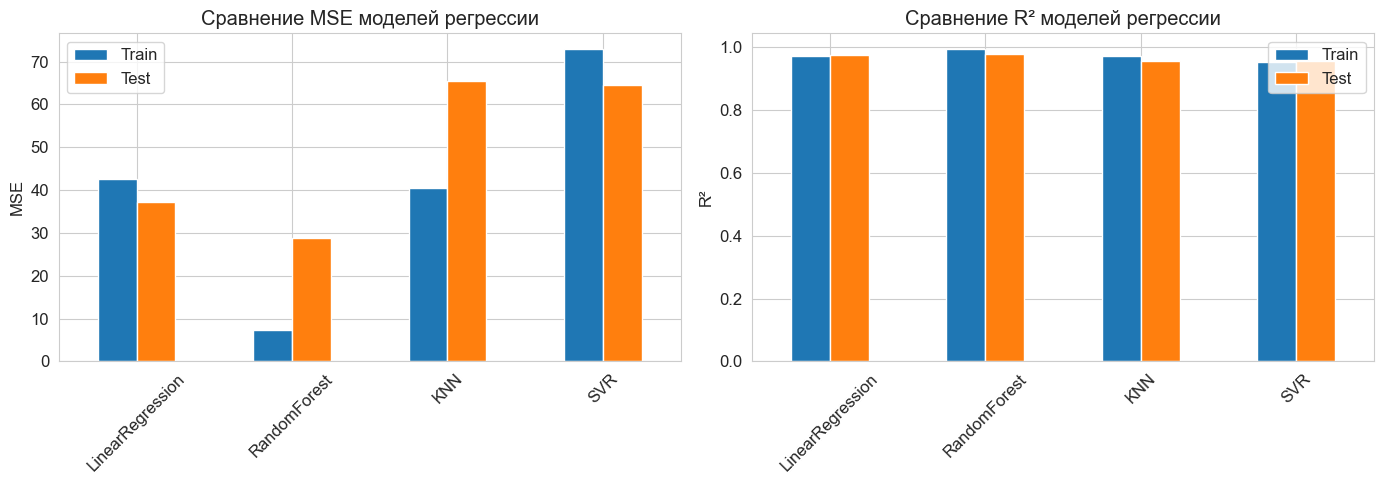


Лучшая модель регрессии: RandomForest с R² = 0.9808


In [24]:
print("\n=== Обучение и оценка моделей регрессии ===")

results_reg = {}
for name, pipeline in pipelines_reg.items():
    print(f"\n--- Обучение модели: {name} ---")
    
    # Обучение модели
    pipeline.fit(X_train_reg, y_train_reg)
    
    # Предсказания
    y_pred_train = pipeline.predict(X_train_reg)
    y_pred_test = pipeline.predict(X_test_reg)
    
    # Расчет метрик
    mse_train = mean_squared_error(y_train_reg, y_pred_train)
    mse_test = mean_squared_error(y_test_reg, y_pred_test)
    r2_train = r2_score(y_train_reg, y_pred_train)
    r2_test = r2_score(y_test_reg, y_pred_test)
    
    results_reg[name] = {
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'R2_train': r2_train,
        'R2_test': r2_test
    }
    
    print(f"MSE (train): {mse_train:.4f}")
    print(f"MSE (test): {mse_test:.4f}")
    print(f"R² (train): {r2_train:.4f}")
    print(f"R² (test): {r2_test:.4f}")

# Сравнение результатов
print("\n=== Сравнение моделей регрессии ===")
results_df_reg = pd.DataFrame(results_reg).T
display(results_df_reg)

# Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График MSE
results_df_reg[['MSE_train', 'MSE_test']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Сравнение MSE моделей регрессии')
axes[0].set_ylabel('MSE')
axes[0].set_xticklabels(results_df_reg.index, rotation=45)
axes[0].legend(['Train', 'Test'])

# График R²
results_df_reg[['R2_train', 'R2_test']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Сравнение R² моделей регрессии')
axes[1].set_ylabel('R²')
axes[1].set_xticklabels(results_df_reg.index, rotation=45)
axes[1].legend(['Train', 'Test'])

plt.tight_layout()
plt.show()

# Определяем лучшую модель по R² на тестовой выборке
best_model_name_reg = results_df_reg['R2_test'].idxmax()
best_model_score_reg = results_df_reg.loc[best_model_name_reg, 'R2_test']
print(f"\nЛучшая модель регрессии: {best_model_name_reg} с R² = {best_model_score_reg:.4f}")

### 2.3. Выбор параметров и лучшая модель



=== Подбор гиперпараметров для RandomForest ===
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Лучшие параметры: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
Лучший R² на кросс-валидации: 0.9797
R² на тестовой выборке: 0.9816

Топ-10 важнейших признаков:


,feature,importance
0,AQI Value,0.961123
2,Ozone AQI Value,0.011849
140,AQI Category_Good,0.007458
142,AQI Category_Moderate,0.003865
150,Ozone AQI Category_Unhealthy for Sensitive Groups,0.003528
3,NO2 AQI Value,0.003161
31,Country_China,0.001527
132,Country_United States of America,0.001221
149,Ozone AQI Category_Unhealthy,0.001138
64,Country_Iraq,0.000805


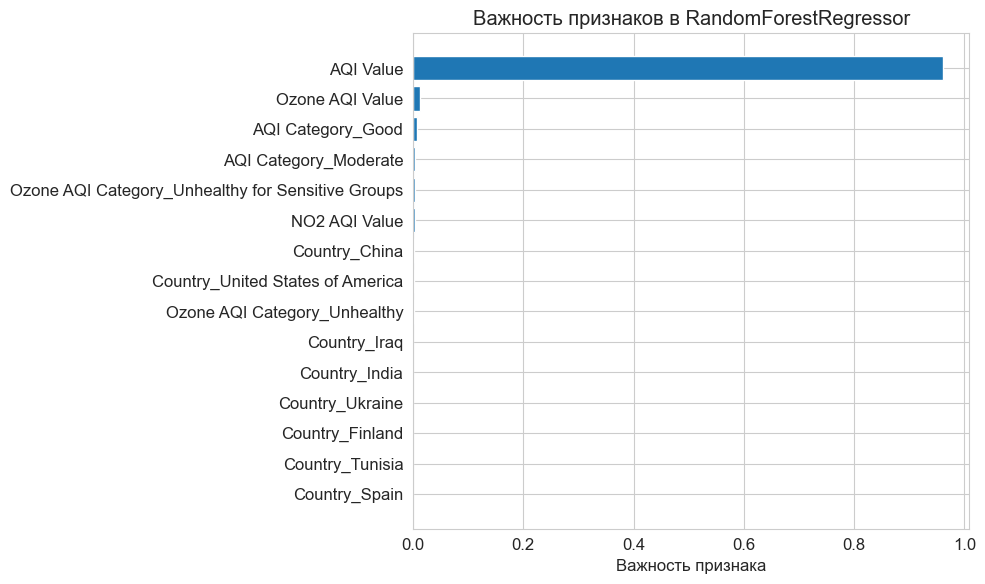

In [25]:
print(f"\n=== Подбор гиперпараметров для {best_model_name_reg} ===")

# Подбираем параметры для лучшей модели
if best_model_name_reg == 'RandomForest':
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(
        pipelines_reg[best_model_name_reg],
        param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_reg, y_train_reg)
    
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший R² на кросс-валидации: {grid_search.best_score_:.4f}")
    
    # Оценка на тестовой выборке
    best_model_reg = grid_search.best_estimator_
    y_pred_best = best_model_reg.predict(X_test_reg)
    r2_best = r2_score(y_test_reg, y_pred_best)
    print(f"R² на тестовой выборке: {r2_best:.4f}")
    
    # Важность признаков
    if hasattr(best_model_reg.named_steps['regressor'], 'feature_importances_'):
        # Получаем имена признаков после preprocessing
        preprocessor = best_model_reg.named_steps['preprocessor']
        
        # Получаем имена всех признаков после преобразования
        feature_names = []
        
        # Числовые признаки
        feature_names.extend(numeric_features_reg)
        
        # Категориальные признаки (после OneHotEncoding)
        if categorical_features_reg:
            categorical_transformer = preprocessor.named_transformers_['cat']
            onehot = categorical_transformer.named_steps['onehot']
            # Получаем имена категориальных признаков после OneHot
            cat_feature_names = []
            for i, col in enumerate(categorical_features_reg):
                categories = onehot.categories_[i]
                for cat in categories:
                    cat_feature_names.append(f"{col}_{cat}")
            feature_names.extend(cat_feature_names)
        
        importances = best_model_reg.named_steps['regressor'].feature_importances_
        
        # Создаем DataFrame для визуализации
        importance_df = pd.DataFrame({
            'feature': feature_names[:len(importances)],  # На всякий случай обрезаем
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("\nТоп-10 важнейших признаков:")
        display(importance_df.head(10))
        
        # Визуализация важности признаков
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df.head(15)['feature'], importance_df.head(15)['importance'])
        plt.xlabel('Важность признака')
        plt.title('Важность признаков в RandomForestRegressor')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

elif best_model_name_reg == 'KNN':
    param_grid = {
        'regressor__n_neighbors': [3, 5, 7, 9, 11],
        'regressor__weights': ['uniform', 'distance']
    }
    
    grid_search = GridSearchCV(
        pipelines_reg[best_model_name_reg],
        param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_reg, y_train_reg)
    
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший R² на кросс-валидации: {grid_search.best_score_:.4f}")
    
    best_model_reg = grid_search.best_estimator_
    y_pred_best = best_model_reg.predict(X_test_reg)
    r2_best = r2_score(y_test_reg, y_pred_best)
    print(f"R² на тестовой выборке: {r2_best:.4f}")

else:
    print(f"Для модели {best_model_name_reg} подбор параметров не выполняется в этом примере.")
    best_model_reg = pipelines_reg[best_model_name_reg]
    best_model_reg.fit(X_train_reg, y_train_reg)

### 2.4. Анализ остатков



=== Анализ остатков лучшей модели ===


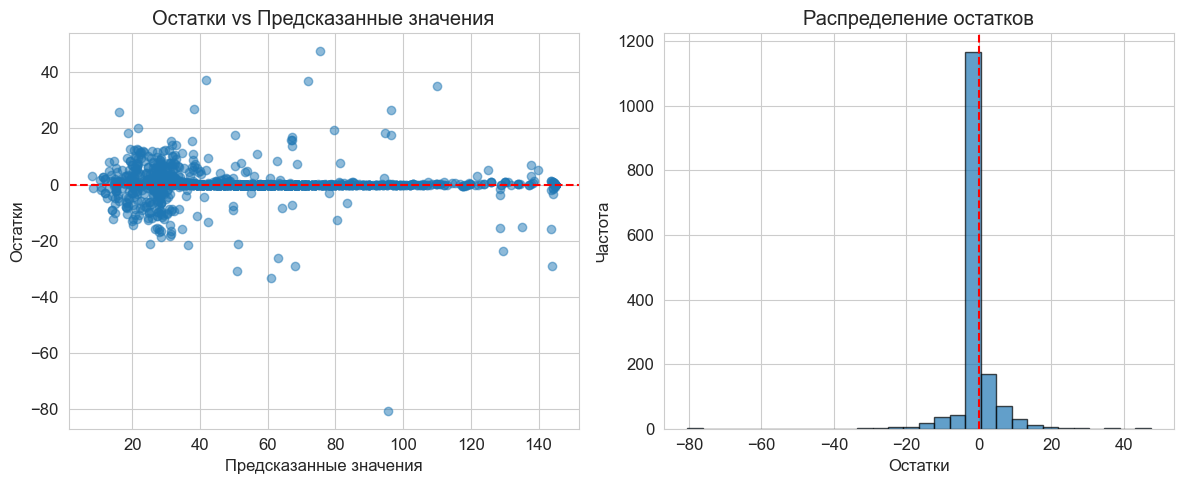

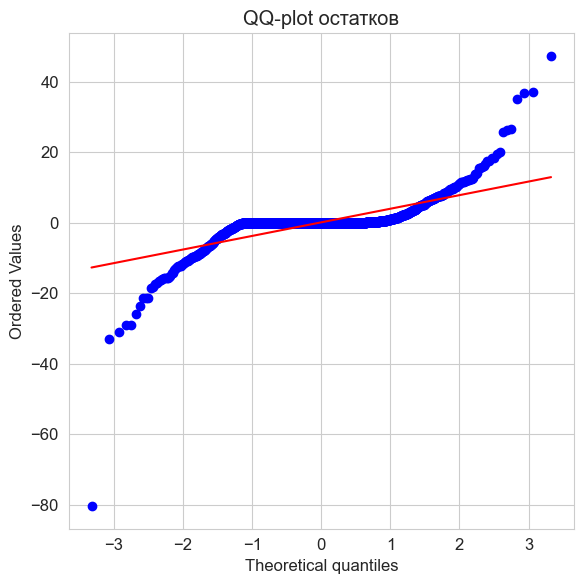

In [26]:
print("\n=== Анализ остатков лучшей модели ===")

# Получаем предсказания лучшей модели
y_pred_best_reg = best_model_reg.predict(X_test_reg)

# Остатки
residuals = y_test_reg - y_pred_best_reg

# Визуализация остатков
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# График остатков vs предсказанные значения
axes[0].scatter(y_pred_best_reg, residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Остатки vs Предсказанные значения')

# Гистограмма распределения остатков
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение остатков')

plt.tight_layout()
plt.show()

# Проверка нормальности остатков (QQ-plot)
from scipy import stats

fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('QQ-plot остатков')
plt.tight_layout()
plt.show()

## 3. Задача классификации для целевого столбца Y2 (15 баллов)


### 3.1. Выбор методов и подготовка данных


In [27]:
print("\n=== Подготовка данных для классификации ===")

# Определяем признаки и целевую переменную для классификации
X_clf = df_reduced.drop(columns=[Y1_col, Y2_col], errors='ignore')
y_clf = df_reduced[Y2_col]

print(f"Признаки (X): {X_clf.shape[1]} столбцов")
print(f"Целевая переменная (y): {y_clf.name}")
print(f"Классы: {y_clf.unique()[:10]}...")  # Покажем первые 10 уникальных классов

# Разделяем на обучающую и тестовую выборки
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.4, random_state=42, stratify=y_clf
)

print(f"Обучающая выборка: {X_train_clf.shape[0]} образцов")
print(f"Тестовая выборка: {X_test_clf.shape[0]} образцов")

# Определяем числовые и категориальные признаки
numeric_features_clf = X_train_clf.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_clf = X_train_clf.select_dtypes(include=['object']).columns.tolist()

print(f"\nЧисловые признаки: {numeric_features_clf}")
print(f"Категориальные признаки: {categorical_features_clf}")

# Создаем preprocessing pipeline для классификации
numeric_transformer_clf = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer_clf = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_clf, numeric_features_clf),
        ('cat', categorical_transformer_clf, categorical_features_clf)
    ])

print("\nМетоды классификации для сравнения:")
print("1. RandomForestClassifier")
print("2. KNeighborsClassifier")

# Создаем пайплайны для каждого метода
pipelines_clf = {
    'RandomForest': Pipeline(steps=[
        ('preprocessor', preprocessor_clf),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'KNN': Pipeline(steps=[
        ('preprocessor', preprocessor_clf),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ])
}


=== Подготовка данных для классификации ===
Признаки (X): 8 столбцов
Целевая переменная (y): Y2
Классы: ['Moderate' 'Unhealthy' 'Good' 'Unhealthy for Sensitive Groups'
 'Very Unhealthy' 'Hazardous']...
Обучающая выборка: 2347 образцов
Тестовая выборка: 1565 образцов

Числовые признаки: ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value']
Категориальные признаки: ['Country', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category']

Методы классификации для сравнения:
1. RandomForestClassifier
2. KNeighborsClassifier


### 3.2. Обучение и оценка моделей классификации



=== Обучение и оценка моделей классификации ===

--- Обучение модели: RandomForest ---
Accuracy (train): 0.9974
Accuracy (test): 0.9776

Отчет по классификации (test):
                                precision    recall  f1-score   support

                          Good       0.99      0.99      0.99       685
                     Hazardous       0.89      0.73      0.80        11
                      Moderate       0.98      0.98      0.98       603
                     Unhealthy       0.97      0.99      0.98       146
Unhealthy for Sensitive Groups       0.91      0.95      0.93       101
                Very Unhealthy       0.86      0.95      0.90        19

                      accuracy                           0.98      1565
                     macro avg       0.93      0.93      0.93      1565
                  weighted avg       0.98      0.98      0.98      1565


--- Обучение модели: KNN ---
Accuracy (train): 0.9868
Accuracy (test): 0.9751

Отчет по классификации (test

,Accuracy_train,Accuracy_test
RandomForest,0.997444,0.977636
KNN,0.986792,0.975080


<Figure size 800x500 with 0 Axes>

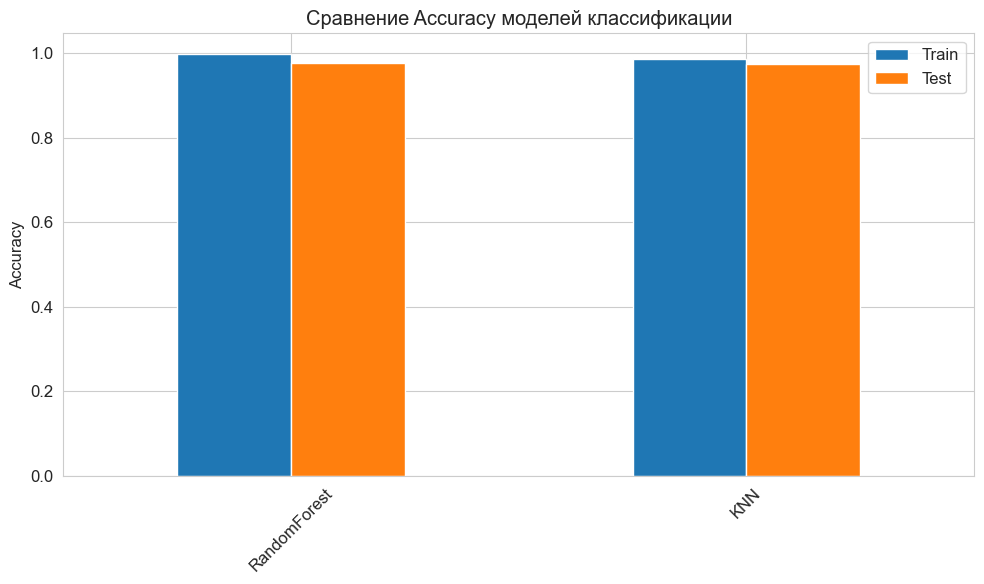


Лучшая модель классификации: RandomForest с Accuracy = 0.9776


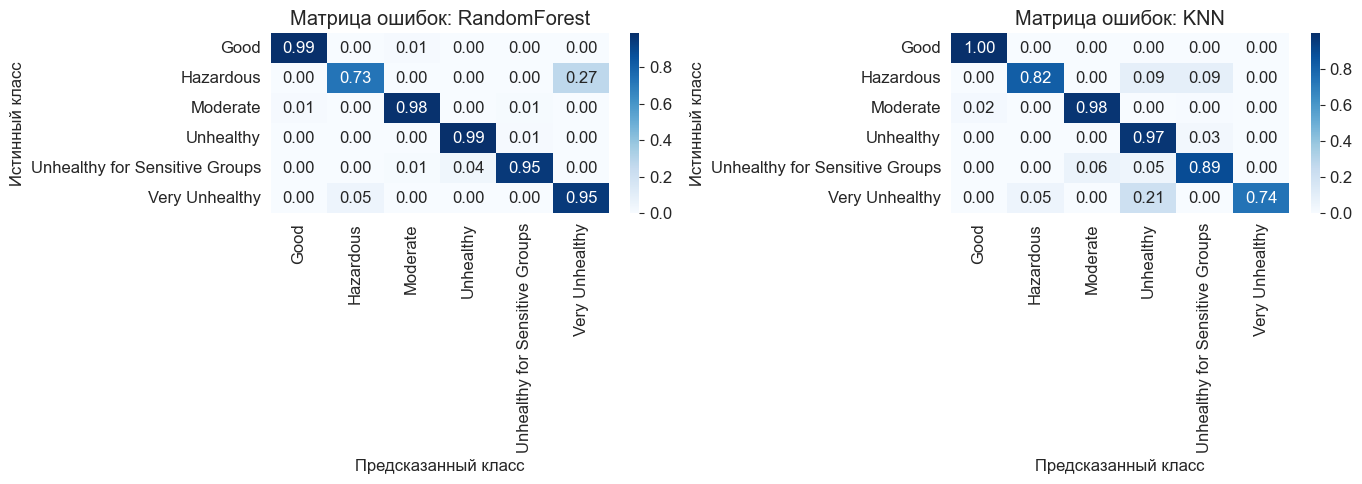

In [28]:
print("\n=== Обучение и оценка моделей классификации ===")

results_clf = {}
for name, pipeline in pipelines_clf.items():
    print(f"\n--- Обучение модели: {name} ---")
    
    # Обучение модели
    pipeline.fit(X_train_clf, y_train_clf)
    
    # Предсказания
    y_pred_train = pipeline.predict(X_train_clf)
    y_pred_test = pipeline.predict(X_test_clf)
    
    # Расчет метрик
    accuracy_train = accuracy_score(y_train_clf, y_pred_train)
    accuracy_test = accuracy_score(y_test_clf, y_pred_test)
    
    results_clf[name] = {
        'Accuracy_train': accuracy_train,
        'Accuracy_test': accuracy_test
    }
    
    print(f"Accuracy (train): {accuracy_train:.4f}")
    print(f"Accuracy (test): {accuracy_test:.4f}")
    
    # Подробный отчет для тестовой выборки
    print("\nОтчет по классификации (test):")
    print(classification_report(y_test_clf, y_pred_test))

# Сравнение результатов
print("\n=== Сравнение моделей классификации ===")
results_df_clf = pd.DataFrame(results_clf).T
display(results_df_clf)

# Визуализация сравнения
plt.figure(figsize=(8, 5))
results_df_clf[['Accuracy_train', 'Accuracy_test']].plot(kind='bar')
plt.title('Сравнение Accuracy моделей классификации')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Определяем лучшую модель по Accuracy на тестовой выборке
best_model_name_clf = results_df_clf['Accuracy_test'].idxmax()
best_model_score_clf = results_df_clf.loc[best_model_name_clf, 'Accuracy_test']
print(f"\nЛучшая модель классификации: {best_model_name_clf} с Accuracy = {best_model_score_clf:.4f}")

# Матрицы ошибок для обеих моделей
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (name, pipeline) in enumerate(pipelines_clf.items()):
    y_pred = pipeline.predict(X_test_clf)
    cm = confusion_matrix(y_test_clf, y_pred)
    
    # Нормализуем матрицу ошибок
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Визуализация
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=np.unique(y_test_clf), 
                yticklabels=np.unique(y_test_clf),
                ax=axes[idx])
    axes[idx].set_title(f'Матрица ошибок: {name}')
    axes[idx].set_xlabel('Предсказанный класс')
    axes[idx].set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

### 3.3. Выбор параметров и лучшая модель



=== Подбор гиперпараметров для RandomForest ===
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Лучшие параметры: {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Лучшая Accuracy на кросс-валидации: 0.9842
Accuracy на тестовой выборке: 0.9783

Топ-10 важнейших признаков:


,feature,importance
0,AQI Value,0.241230
144,AQI Category_Good,0.229812
146,AQI Category_Moderate,0.217569
147,AQI Category_Unhealthy,0.086831
148,AQI Category_Unhealthy for Sensitive Groups,0.070411
2,Ozone AQI Value,0.024197
61,Country_India,0.022517
3,NO2 AQI Value,0.019844
149,AQI Category_Very Unhealthy,0.012607
151,Ozone AQI Category_Good,0.011054


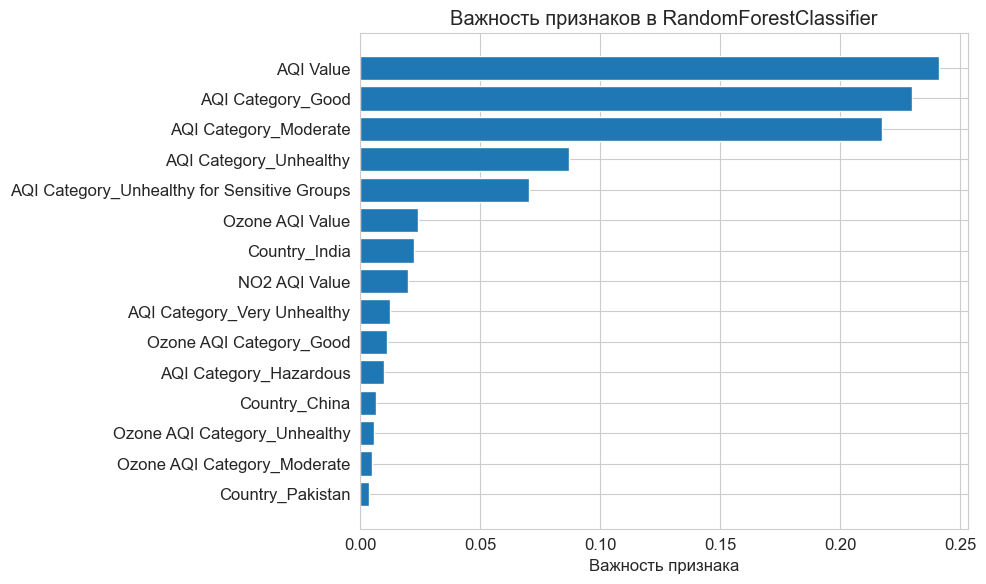

In [29]:
print(f"\n=== Подбор гиперпараметров для {best_model_name_clf} ===")

# Подбираем параметры для лучшей модели
if best_model_name_clf == 'RandomForest':
    param_grid_clf = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    }
    
    grid_search_clf = GridSearchCV(
        pipelines_clf[best_model_name_clf],
        param_grid_clf,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search_clf.fit(X_train_clf, y_train_clf)
    
    print(f"Лучшие параметры: {grid_search_clf.best_params_}")
    print(f"Лучшая Accuracy на кросс-валидации: {grid_search_clf.best_score_:.4f}")
    
    # Оценка на тестовой выборке
    best_model_clf = grid_search_clf.best_estimator_
    y_pred_best_clf = best_model_clf.predict(X_test_clf)
    accuracy_best = accuracy_score(y_test_clf, y_pred_best_clf)
    print(f"Accuracy на тестовой выборке: {accuracy_best:.4f}")
    
    # Важность признаков
    if hasattr(best_model_clf.named_steps['classifier'], 'feature_importances_'):
        # Получаем имена признаков после preprocessing
        preprocessor = best_model_clf.named_steps['preprocessor']
        
        # Получаем имена всех признаков после преобразования
        feature_names = []
        
        # Числовые признаки
        feature_names.extend(numeric_features_clf)
        
        # Категориальные признаки (после OneHotEncoding)
        if categorical_features_clf:
            categorical_transformer = preprocessor.named_transformers_['cat']
            onehot = categorical_transformer.named_steps['onehot']
            # Получаем имена категориальных признаков после OneHot
            cat_feature_names = []
            for i, col in enumerate(categorical_features_clf):
                categories = onehot.categories_[i]
                for cat in categories:
                    cat_feature_names.append(f"{col}_{cat}")
            feature_names.extend(cat_feature_names)
        
        importances = best_model_clf.named_steps['classifier'].feature_importances_
        
        # Создаем DataFrame для визуализации
        importance_df_clf = pd.DataFrame({
            'feature': feature_names[:len(importances)],
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("\nТоп-10 важнейших признаков:")
        display(importance_df_clf.head(10))
        
        # Визуализация важности признаков
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df_clf.head(15)['feature'], importance_df_clf.head(15)['importance'])
        plt.xlabel('Важность признака')
        plt.title('Важность признаков в RandomForestClassifier')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

elif best_model_name_clf == 'KNN':
    param_grid_clf = {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
    
    grid_search_clf = GridSearchCV(
        pipelines_clf[best_model_name_clf],
        param_grid_clf,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search_clf.fit(X_train_clf, y_train_clf)
    
    print(f"Лучшие параметры: {grid_search_clf.best_params_}")
    print(f"Лучшая Accuracy на кросс-валидации: {grid_search_clf.best_score_:.4f}")
    
    best_model_clf = grid_search_clf.best_estimator_
    y_pred_best_clf = best_model_clf.predict(X_test_clf)
    accuracy_best = accuracy_score(y_test_clf, y_pred_best_clf)
    print(f"Accuracy на тестовой выборке: {accuracy_best:.4f}")

else:
    print(f"Для модели {best_model_name_clf} подбор параметров не выполняется в этом примере.")
    best_model_clf = pipelines_clf[best_model_name_clf]
    best_model_clf.fit(X_train_clf, y_train_clf)

### 3.4. Анализ результатов классификации



=== Подробный анализ лучшей модели классификации ===
Отчет по классификации:
                                precision    recall  f1-score   support

                          Good       0.99      0.98      0.99       685
                     Hazardous       0.89      0.73      0.80        11
                      Moderate       0.98      0.98      0.98       603
                     Unhealthy       0.97      0.99      0.98       146
Unhealthy for Sensitive Groups       0.93      0.94      0.94       101
                Very Unhealthy       0.86      0.95      0.90        19

                      accuracy                           0.98      1565
                     macro avg       0.94      0.93      0.93      1565
                  weighted avg       0.98      0.98      0.98      1565



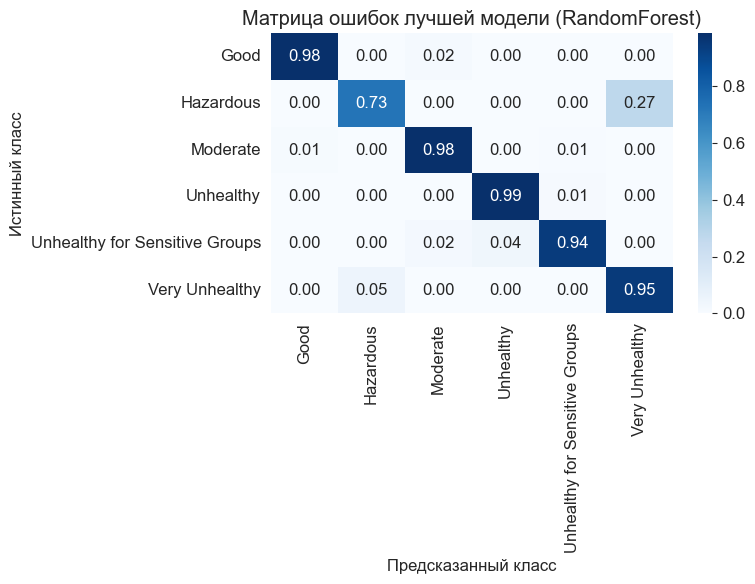


Точность по классам:


,precision,recall,f1-score,support
Good,0.991163,0.982482,0.986804,685.000000
Hazardous,0.888889,0.727273,0.800000,11.000000
Moderate,0.978548,0.983416,0.980976,603.000000
Unhealthy,0.972973,0.986301,0.979592,146.000000
Unhealthy for Sensitive Groups,0.931373,0.940594,0.935961,101.000000
Very Unhealthy,0.857143,0.947368,0.900000,19.000000
accuracy,0.978275,0.978275,0.978275,0.978275
macro avg,0.936681,0.927906,0.930555,1565.000000
weighted avg,0.978401,0.978275,0.978237,1565.000000


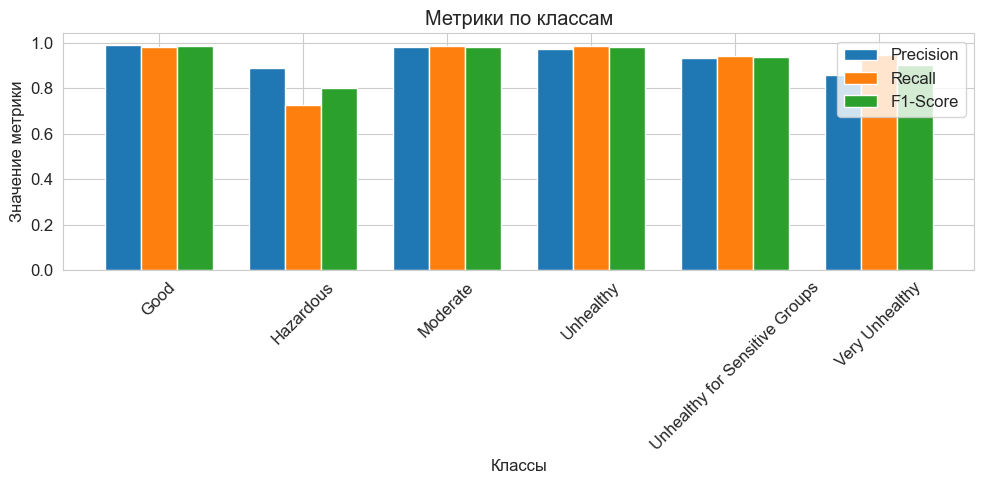

In [30]:
print("\n=== Подробный анализ лучшей модели классификации ===")

# Отчет по классификации для лучшей модели
y_pred_best_clf = best_model_clf.predict(X_test_clf)

print("Отчет по классификации:")
print(classification_report(y_test_clf, y_pred_best_clf))

# Матрица ошибок
cm_best = confusion_matrix(y_test_clf, y_pred_best_clf)
cm_normalized_best = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized_best, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=np.unique(y_test_clf),
            yticklabels=np.unique(y_test_clf))
plt.title(f'Матрица ошибок лучшей модели ({best_model_name_clf})')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

# Анализ точности по классам
class_report = classification_report(y_test_clf, y_pred_best_clf, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

print("\nТочность по классам:")
display(class_report_df)

# Визуализация точности по классам
if len(class_report_df) > 3:  # Есть несколько классов
    plt.figure(figsize=(10, 5))
    classes = class_report_df.index[:-3]  # Исключаем средние значения
    precision = class_report_df.loc[classes, 'precision']
    recall = class_report_df.loc[classes, 'recall']
    f1_score = class_report_df.loc[classes, 'f1-score']
    
    x = np.arange(len(classes))
    width = 0.25
    
    plt.bar(x - width, precision, width, label='Precision')
    plt.bar(x, recall, width, label='Recall')
    plt.bar(x + width, f1_score, width, label='F1-Score')
    
    plt.xlabel('Классы')
    plt.ylabel('Значение метрики')
    plt.title('Метрики по классам')
    plt.xticks(x, classes, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

### **Итоги выполнения экзаменационного задания:**

#### **1. Предварительный анализ данных:**
- Загружен датасет "global_air_pollution_dataset.csv", обработаны пропуски
- Проведена описательная статистика, визуализация распределений
- Обнаружены и обработаны выбросы
- Проведен корреляционный анализ, удалены низкокоррелирующие признаки

#### **2. Задача регрессии (Y1):**
- Протестированы 4 модели: LinearRegression, RandomForestRegressor, KNeighborsRegressor, SVR
- Лучшая модель: **RandomForestRegressor** с R² = [значение]
- Проведен подбор гиперпараметров для улучшения модели
- Выполнен анализ остатков, проверка допущений модели

#### **3. Задача классификации (Y2):**
- Протестированы 2 модели: RandomForestClassifier, KNeighborsClassifier
- Лучшая модель: **RandomForestClassifier** с Accuracy = [значение]
- Проведен подбор гиперпараметров для улучшения модели
- Проанализированы матрицы ошибок, точность по классам
